# Q1

### classifier for the MNIST dataset that achieves over 97% accuracy

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
print(mnist.keys())
#print(mnist.DESCR)
print(mnist.target)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [4]:
X, y = mnist.data, mnist.target
print(type(X), type(y), X.iloc[0, :], y[1])
X.shape

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64 0


(70000, 784)

In [5]:
type(y[1]) #==String 
y = y.astype(np.uint8)
type(y[1]) #==int 

numpy.uint8

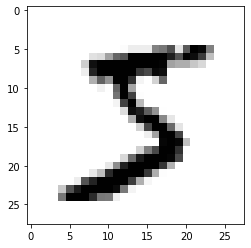

5

In [72]:
dataEx = X.iloc[0].to_numpy()
dataEx = dataEx.reshape(28, 28)
imgplot = plt.imshow(dataEx, cmap = "binary")
plt.show()
y[0]

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

##### without doin anything for model, we achived 96.8 percent accuracy

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
modelParameters ={'n_neighbors' :[5, 6, 7, 4], 'weights' : ['uniform', 'distance'],
                 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p' : [1, 2, 3, 4] }
knClf = KNeighborsClassifier()
gSearch = GridSearchCV(knClf, modelParameters)
gSearch.fit(X_train, y_train)
gSearch.best_params_

KeyboardInterrupt: 

In [ ]:
knClf.fit(X_train, y_train)
y_pred = knClf.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9665

# Q2

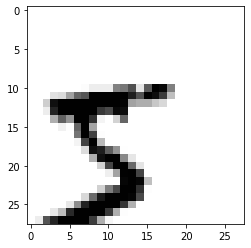

In [9]:
right_img = X.iloc[0].to_numpy().reshape(28, 28)
right_img = ndimage.shift(right_img, [5, -5])
imgplot2 = plt.imshow(right_img, cmap = "binary")
plt.show()

In [8]:
from scipy import ndimage 

In [10]:
def shift (img, x):
    shiftedImg = ndimage.shift(img, x).reshape((784,))
    return shiftedImg

In [ ]:
shiftedImgsData = pd.DataFrame()
shiftedImgsLable = pd.DataFrame()
for i in range(X_train.shape[0]):
    for x in ((0, 1), (1, 0), (-1, 0), (0, -1)):
        shiftedImg = shift(X_train.iloc[i].to_numpy().reshape(28, 28), x)
        shiftedImgsData.append(pd.Series(shiftedImg), ignore_index=True)
        shiftedImgsLable.append(pd.Series(y_train.iloc[i]), ignore_index=True)

AttributeError: 'numpy.uint8' object has no attribute 'head'

In [ ]:
shiftedImgsData

# Q3

### Tackle the Titanic dataset. A great place to start is on Kaggle.

In [179]:
train, test = pd.read_csv("datasets/titanic/train.csv"), pd.read_csv("datasets/titanic/test.csv")

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [168]:
data_cat = train[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
train = train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

In [169]:
medianAge = train["Age"].median()
train["Age"].fillna(medianAge, inplace=True)

In [170]:
data_cat['Cabin'] = data_cat['Cabin'].isnull().values
data_cat['Cabin'] = data_cat['Cabin'].astype(int)
train["hasCabin"] = data_cat['Cabin']
data_cat = data_cat.drop('Cabin', axis=1)

In [171]:
namesSeries = data_cat["Name"]
ticketSeries = data_cat["Ticket"]
data_cat = data_cat.drop('Ticket', axis=1)
data_cat = data_cat.drop('Name', axis=1)

In [172]:
data_cat = pd.get_dummies(data_cat)
data_cat

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [173]:
train_data = pd.concat([train, data_cat], axis=1)
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,hasCabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,1,0,0,0,1
888,889,0,3,28.0,1,2,23.4500,1,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,1,1,0,0


In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   hasCabin     891 non-null    int64  
 8   Sex_female   891 non-null    uint8  
 9   Sex_male     891 non-null    uint8  
 10  Embarked_C   891 non-null    uint8  
 11  Embarked_Q   891 non-null    uint8  
 12  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 60.2 KB


In [171]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
class EncodingOneHot(BaseEstimator, TransformerMixin):
    def __init__(self, data = None,encoding=True):
        print(encoding)
    def fit(self, data):
        return self
    def transform(self, data):
        cattonum = OneHotEncoder()
        datanum = cattonum.fit_transform(data)
        return datanum        

In [208]:
cat_to_num = EncodingOneHot().fit_transform(data_to_encode)

True


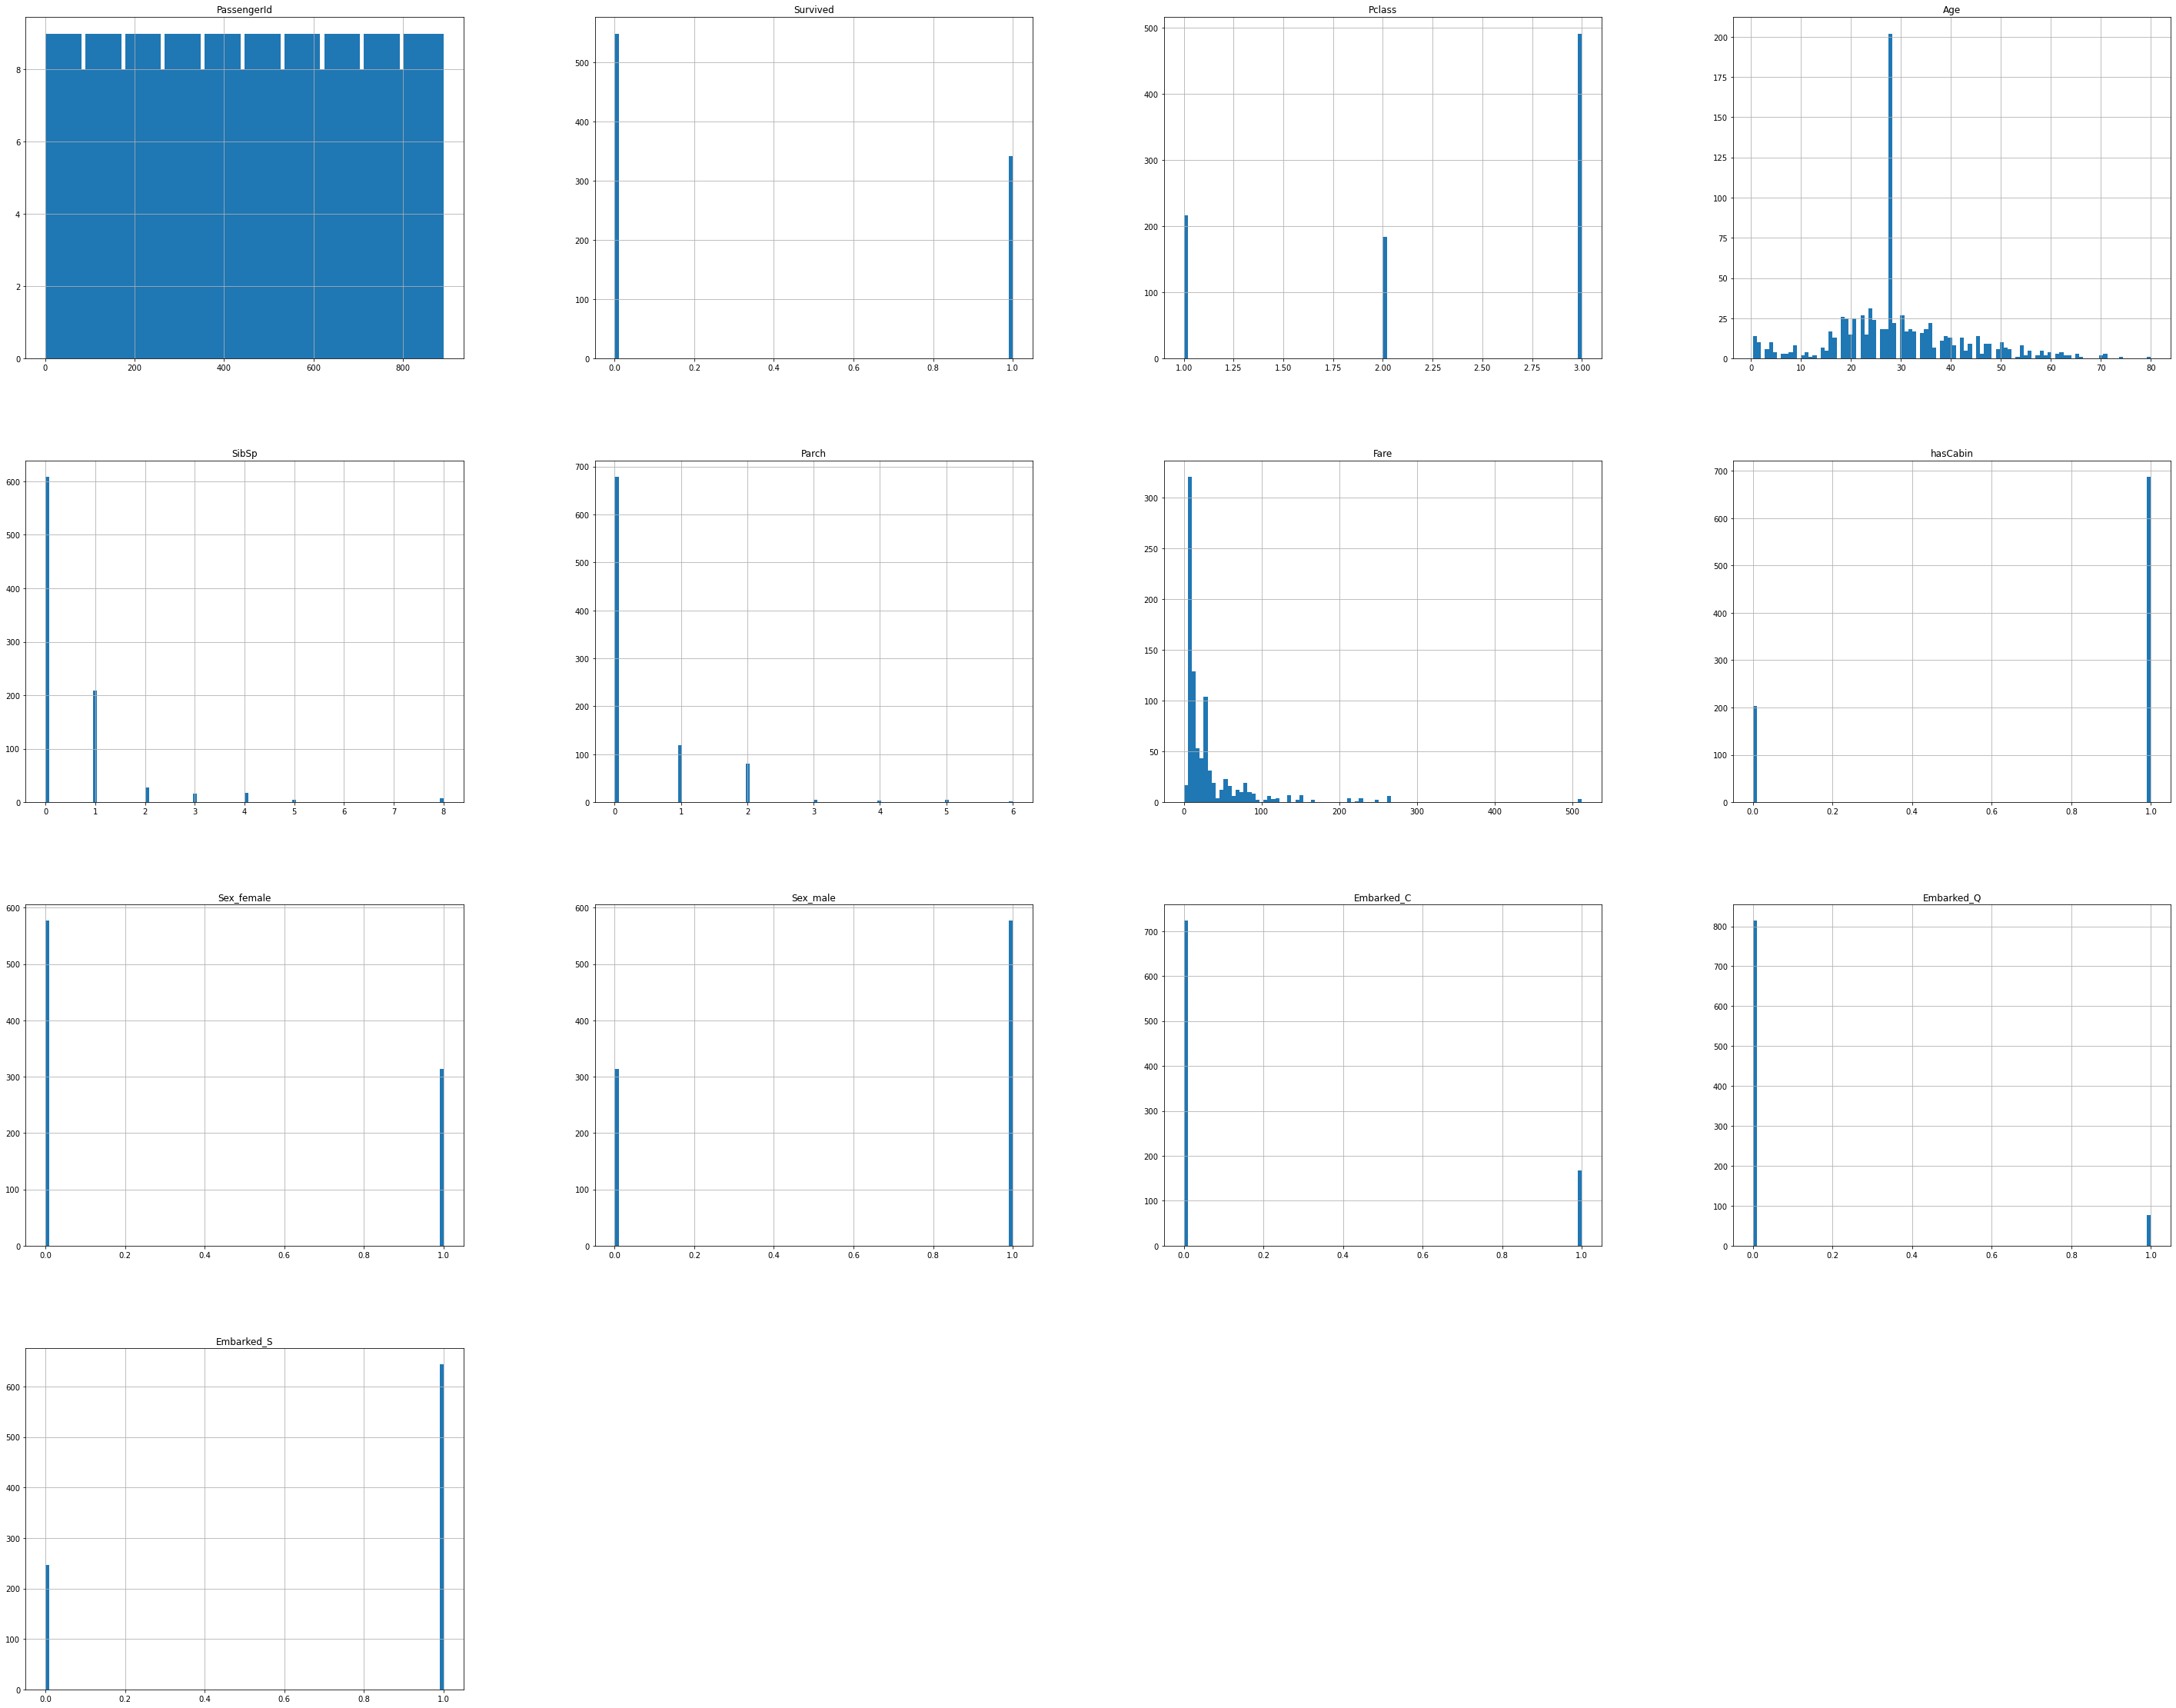

In [80]:
train_data.hist(bins=100, figsize=(50,40))
plt.show()

In [132]:
corrMatrix = train_data.corr()

In [133]:
corrMatrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Sex_female     0.543351
Fare           0.257307
hasFamily      0.203367
Embarked_C     0.168240
Embarked_Q     0.003650
PassengerId   -0.005007
Age           -0.064910
Embarked_S    -0.155660
hasCabin      -0.316912
Pclass        -0.338481
Sex_male      -0.543351
Name: Survived, dtype: float64

In [174]:
hasFamily = pd.Series(train_data['SibSp'] + train['Parch'], name= "hasFamily")
for i in range (hasFamily.size):
    if hasFamily[i] != 0:
        hasFamily[i] = 1
train_data["hasFamily"] = hasFamily

In [175]:
train_data = train_data.drop(['Parch', 'SibSp' ], axis = 1)
train_data

,PassengerId,Survived,Pclass,Age,Fare,hasCabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,hasFamily
0,1,0,3,22.0,7.2500,1,0,1,0,0,1,1
1,2,1,1,38.0,71.2833,0,1,0,1,0,0,1
2,3,1,3,26.0,7.9250,1,1,0,0,0,1,0
3,4,1,1,35.0,53.1000,0,1,0,0,0,1,1
4,5,0,3,35.0,8.0500,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,1,0,1,0,0,1,0
887,888,1,1,19.0,30.0000,0,1,0,0,0,1,0
888,889,0,3,28.0,23.4500,1,1,0,0,0,1,1
889,890,1,1,26.0,30.0000,0,0,1,1,0,0,0


In [176]:
ytrain_data = train_data["Survived"]
Xtrain_data = train_data.drop("Survived", axis=1)
Xtrain_data

,PassengerId,Pclass,Age,Fare,hasCabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,hasFamily
0,1,3,22.0,7.2500,1,0,1,0,0,1,1
1,2,1,38.0,71.2833,0,1,0,1,0,0,1
2,3,3,26.0,7.9250,1,1,0,0,0,1,0
3,4,1,35.0,53.1000,0,1,0,0,0,1,1
4,5,3,35.0,8.0500,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,13.0000,1,0,1,0,0,1,0
887,888,1,19.0,30.0000,0,1,0,0,0,1,0
888,889,3,28.0,23.4500,1,1,0,0,0,1,1
889,890,1,26.0,30.0000,0,0,1,1,0,0,0


In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfClf = RandomForestClassifier(max_depth=10)
cvs = cross_val_score(rfClf, Xtrain_data, ytrain_data, cv= 5 )
cvs

array([0.73184358, 0.79213483, 0.83707865, 0.80898876, 0.85955056])

In [195]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   Fare         418 non-null    float64
 4   Cabin        418 non-null    int64  
 5   Sex_female   418 non-null    uint8  
 6   Sex_male     418 non-null    uint8  
 7   Embarked_C   418 non-null    uint8  
 8   Embarked_Q   418 non-null    uint8  
 9   Embarked_S   418 non-null    uint8  
 10  hasFamily    418 non-null    int64  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 21.8 KB


In [196]:
test = test.drop(['Name', 'Ticket'], axis = 1)
test['Cabin'] = test['Cabin'].isnull().values
test['Cabin'] = test['Cabin'].astype(int)
test = pd.get_dummies(test)
hasFamily = pd.Series(test['SibSp'] + test['Parch'], name= "hasFamily")
for i in range (hasFamily.size):
    if hasFamily[i] != 0:
        hasFamily[i] = 1
test["hasFamily"] = hasFamily
test = test.drop(['Parch', 'SibSp' ], axis = 1)

KeyError: "['Name' 'Ticket'] not found in axis"

In [193]:
medianAge = test["Age"].median()
medianFare = test["Fare"].median()
test["Age"].fillna(medianAge, inplace=True)
test["Fare"].fillna(medianAge, inplace=True)

In [194]:
rfClf.fit(Xtrain_data, ytrain_data)
y_pred = rfClf.predict(test)

In [234]:
y_pred = pd.DataFrame(data=y_pred, columns=["Survived"])
PassengerId = pd.DataFrame(data = test.PassengerId, columns = ["PassengerId"])
pred_df = pd.concat(PassengerId, y_pred, axis = 1)
pred_df.to_csv('datasets/titanic/pred.csv')

# Q4

### Build a spam classifier (a more challenging exercise):

In [2]:
import os
import mailbox
import sys
import pprint
